# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Import dataset from local mission

In [2]:
train = pd.read_csv("C:/Users/Hari/OneDrive/Desktop/Hacker Earth/Train.csv")
test = pd.read_csv("C:/Users/Hari/OneDrive/Desktop/Hacker Earth/Test.csv")

Save EmdID column from test dataset for submission

In [3]:
EmpID = test["EmpID"]

# Exploratory Data Analysis & Visualizaion

In [4]:
train.head()

,EmpID,EmpName,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,...,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,BiasInfluentialFactor,FitmentPercent
0,11041,John,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,...,21,26,Married,5,SSE,Enterprise,Design,20,YearsOfExperince,95.40
1,15079,William,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,...,15,19,Married,5,BA,MidSized,Engineering,6,NaN,67.09
2,18638,James,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,...,15,24,Single,5,SDE,MidSized,Engineering,19,Gender,91.26
3,3941,Charles,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,...,16,24,Married,5,SDE,Startup,Product,16,Gender,72.29
4,5936,George,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,...,24,32,Married,5,SDE,Enterprise,Engineering,10,DegreeBranch,86.34


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

In [6]:
train.isnull().sum()

EmpID                         0
EmpName                       0
LanguageOfCommunication       0
Age                           0
Gender                        0
JobProfileIDApplyingFor       0
HighestDegree                 0
DegreeBranch                  0
GraduatingInstitute           0
LatestDegreeCGPA              0
YearsOfExperince              0
GraduationYear                0
CurrentCTC                    0
ExpectedCTC                   0
MartialStatus                 0
EmpScore                      0
CurrentDesignation            0
CurrentCompanyType            0
DepartmentInCompany           0
TotalLeavesTaken              0
BiasInfluentialFactor      3336
FitmentPercent                0
dtype: int64

In [7]:
test.isnull().sum()

EmpID                      0
EmpName                    0
LanguageOfCommunication    0
Age                        0
Gender                     0
JobProfileIDApplyingFor    0
HighestDegree              0
DegreeBranch               0
GraduatingInstitute        0
LatestDegreeCGPA           0
YearsOfExperince           0
GraduationYear             0
CurrentCTC                 0
ExpectedCTC                0
MartialStatus              0
EmpScore                   0
CurrentDesignation         0
CurrentCompanyType         0
DepartmentInCompany        0
TotalLeavesTaken           0
dtype: int64

In [8]:
train["BiasInfluentialFactor"].value_counts()

DegreeBranch          2858
Gender                2605
YearsOfExperince      1561
CurrentCompanyType    1174
EmpScore               659
HighestDegree          582
Ethinicity             328
MartialStatus          280
LatestDegreeCGPA       262
Name: BiasInfluentialFactor, dtype: int64

In [9]:
train["BiasInfluentialFactor"] = train["BiasInfluentialFactor"].fillna('None')

In [10]:
train =  train.drop(columns = ["EmpID","EmpName","GraduationYear"],axis = 1)
test =  test.drop(columns = ["EmpID","EmpName","GraduationYear"],axis = 1)

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LanguageOfCommunication', ylabel='count'>

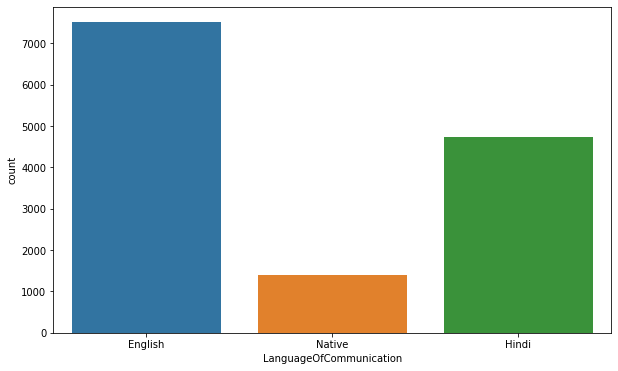

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(train["LanguageOfCommunication"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HighestDegree', ylabel='count'>

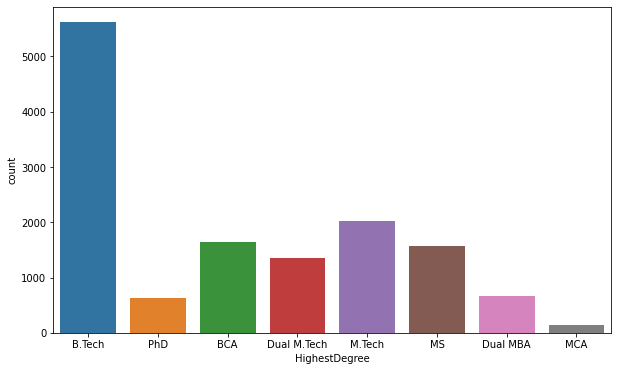

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(train["HighestDegree"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='JobProfileIDApplyingFor', ylabel='count'>

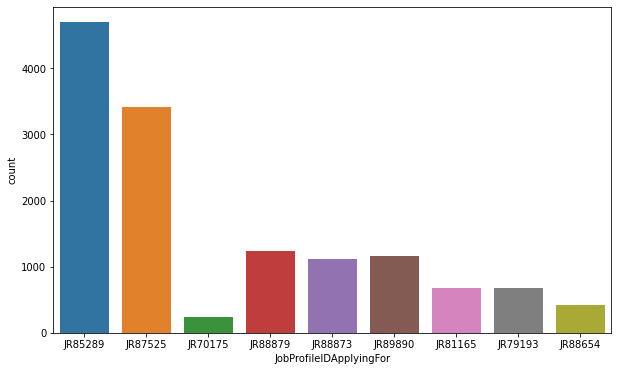

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(train["JobProfileIDApplyingFor"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DegreeBranch', ylabel='count'>

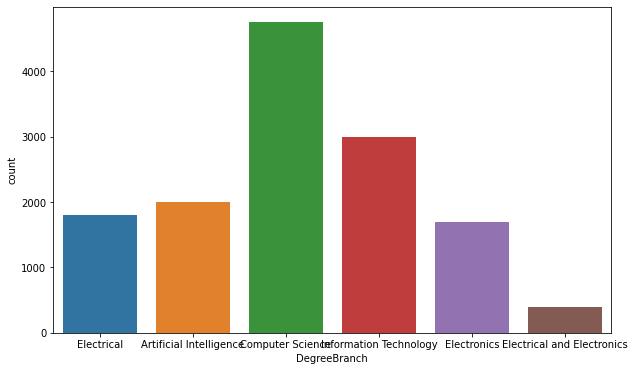

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(train["DegreeBranch"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GraduatingInstitute', ylabel='count'>

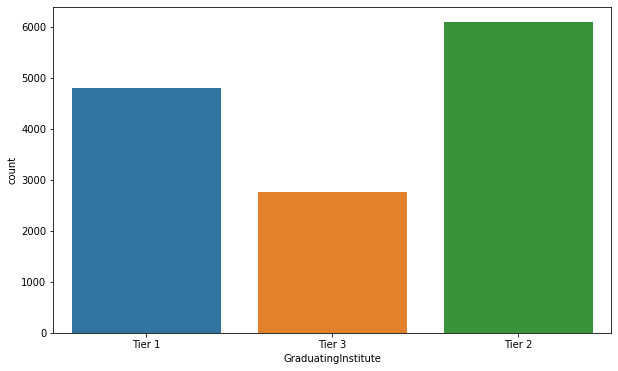

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(train["GraduatingInstitute"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MartialStatus', ylabel='count'>

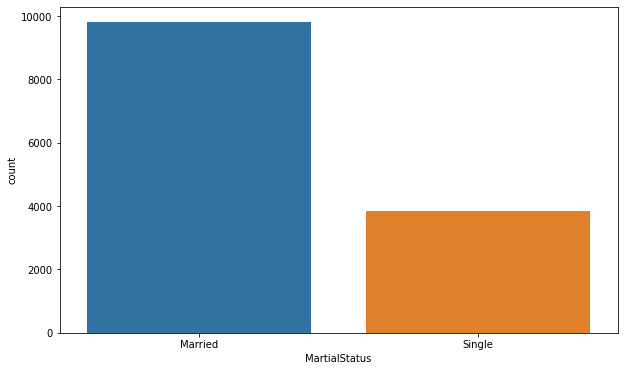

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(train["MartialStatus"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

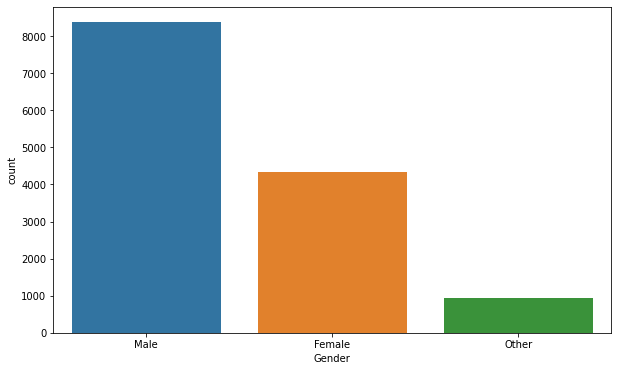

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(train["Gender"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LatestDegreeCGPA', ylabel='count'>

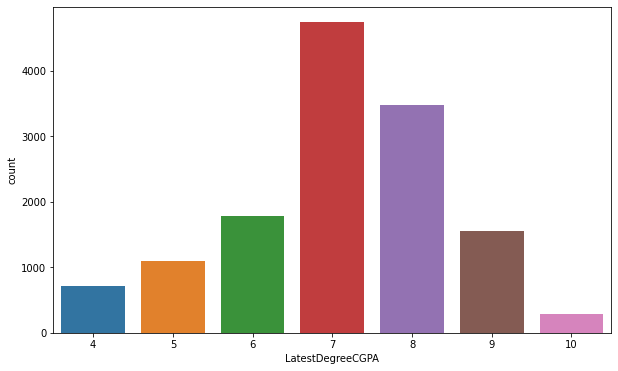

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(train["LatestDegreeCGPA"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CurrentCompanyType', ylabel='count'>

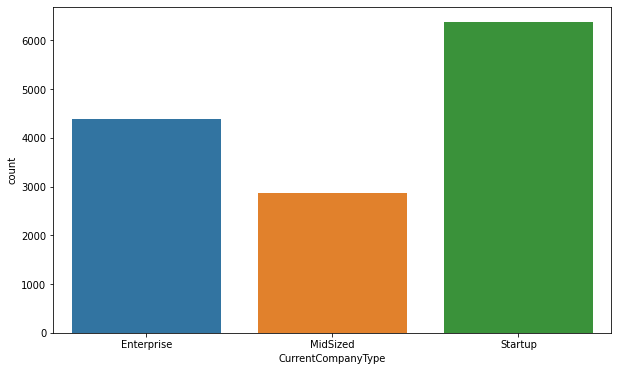

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(train["CurrentCompanyType"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DepartmentInCompany', ylabel='count'>

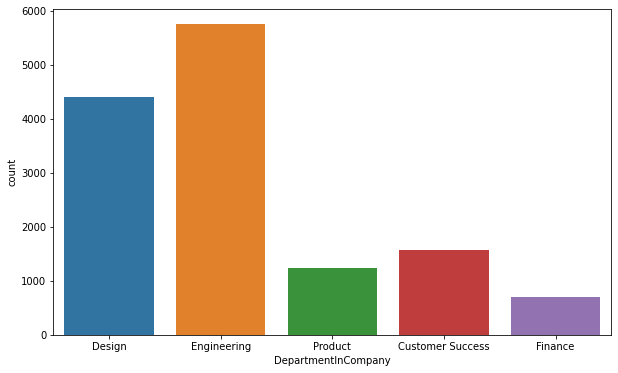

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(train["DepartmentInCompany"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CurrentDesignation', ylabel='count'>

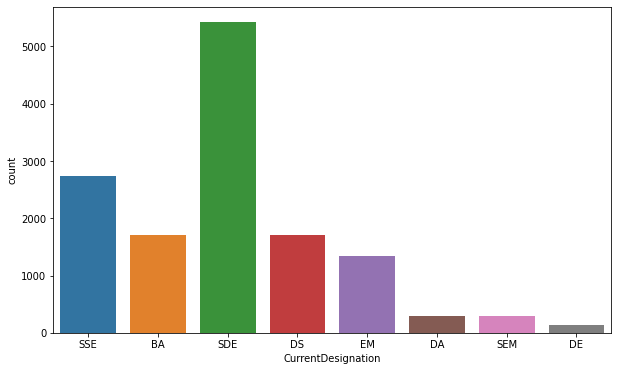

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(train["CurrentDesignation"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

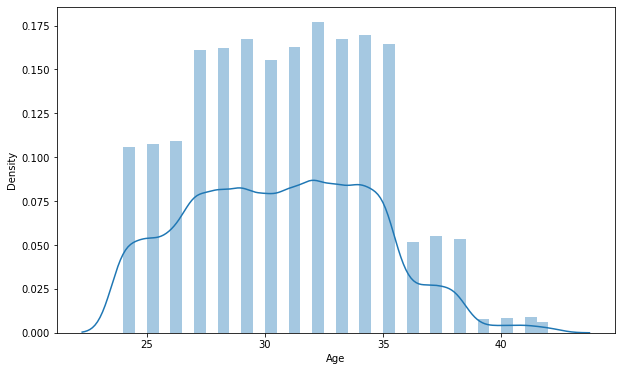

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(train["Age"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ExpectedCTC', ylabel='Density'>

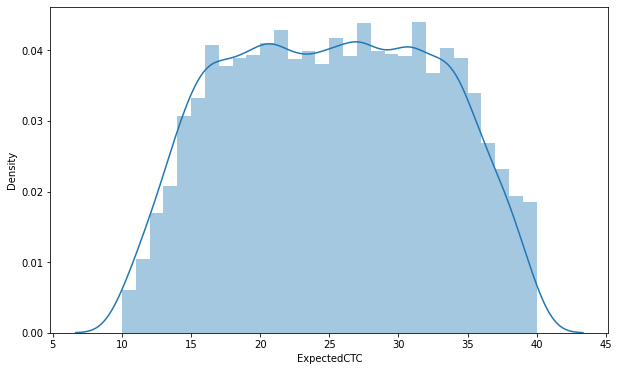

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(train["ExpectedCTC"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CurrentCTC', ylabel='Density'>

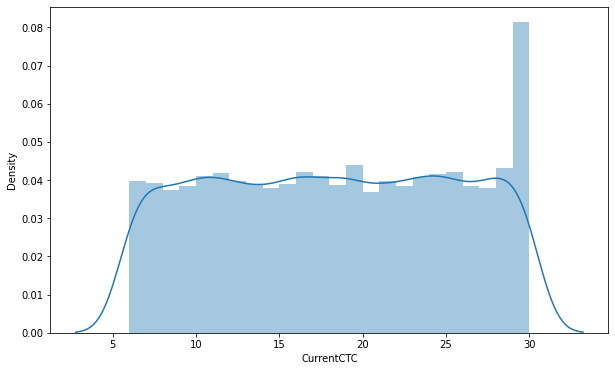

In [24]:
plt.figure(figsize=(10,6))
sns.distplot(train["CurrentCTC"])

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsOfExperince', ylabel='Density'>

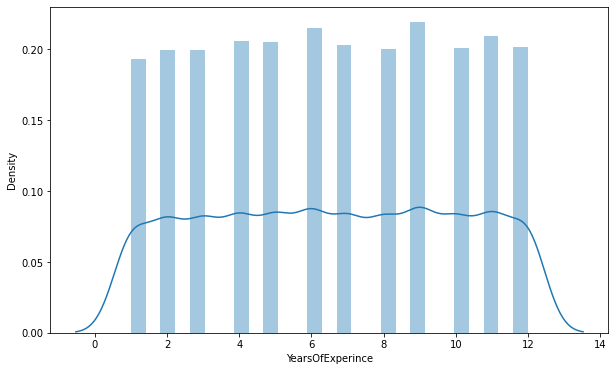

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(train["YearsOfExperince"])

<AxesSubplot:>

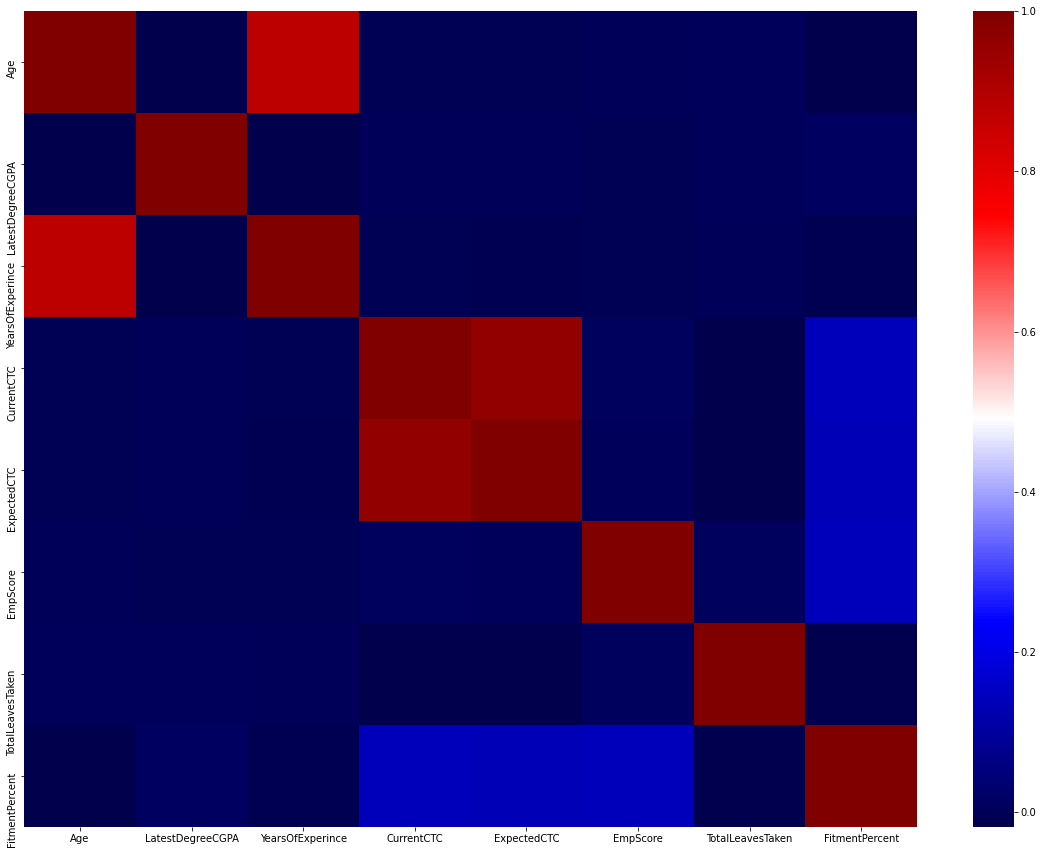

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr(),linecolor='white',cmap='seismic')

**Conversion of categorical variables into numeric using one-hot encoding**

In [27]:
columns = ['LanguageOfCommunication','Gender','JobProfileIDApplyingFor','HighestDegree','DegreeBranch', 'GraduatingInstitute','LatestDegreeCGPA',
'MartialStatus','CurrentDesignation', 'CurrentCompanyType','DepartmentInCompany']

In [28]:
train = pd.get_dummies(train,columns=columns,drop_first=True)
test = pd.get_dummies(test,columns=columns,drop_first=True)

**Custom normalization function instead of using MinMaxScalar**

In [29]:
def normalization(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

**Defining Targets and Features**

In [30]:
x = normalization(train.drop(columns=["BiasInfluentialFactor","FitmentPercent"]))
y = train["BiasInfluentialFactor"]
z = train["FitmentPercent"]

In [31]:
test = normalization(test)

**Spliting train data into train and validation**

In [32]:
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=.3, random_state =123)
xtrain, xvalid, ztrain, zvalid = train_test_split(x, z, test_size=.3, random_state =123)

**XGBoost Classifier and Regressor are used for Predictions**

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
from xgboost import XGBClassifier, XGBRegressor

**Classification Part**

In [35]:
model1 = XGBClassifier().fit(xtrain, ytrain)
pred1 = model1.predict(xvalid)

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [36]:
pred1 = model1.predict(xvalid)

In [37]:
accuracy_score(yvalid,pred1)

0.7928676111382511

Hyper Tuning the model by giving values to parameters
Note : Many Values are tried but suitable values are placed here

In [38]:
model2 = XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.2,  
                      colsample_bytree = 0.3,
                      subsample = 0.6,
                      objective='binary:logistic', 
                      n_estimators=3600, 
                      reg_alpha = 0.3,
                      max_depth=12, 
                      gamma=10).fit(xtrain, ytrain)

c:\users\hari\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Predicting for validation part

In [39]:
pred2 = model2.predict(xvalid)

In [40]:
pred2

array(['HighestDegree', 'YearsOfExperince', 'None', ..., 'Gender',
       'EmpScore', 'DegreeBranch'], dtype=object)

Accuracy is found

In [41]:
accuracy_score(yvalid,pred2)

0.8019052271617001

Test Dataset is given for prediction and result is saved in varibale for further csv creation

In [42]:
bias = model2.predict(test)

In [43]:
bias

array(['DegreeBranch', 'DegreeBranch', 'LatestDegreeCGPA', ...,
       'DegreeBranch', 'None', 'None'], dtype=object)

**Now Regression Part**

In [44]:
modelr = XGBRegressor().fit(xtrain,ztrain)

In [45]:
predr = modelr.predict(xvalid)

In [46]:
predr

array([54.604828, 78.20593 , 62.41902 , ..., 85.50966 , 84.637474,
       79.9865  ], dtype=float32)

R^2 and RMSE values are found

In [47]:
r2_score(zvalid,predr)

0.5874361545588819

In [48]:
import math
from math import sqrt
test_mse = mean_squared_error(zvalid, predr)
rmse = sqrt(test_mse)
print('RMSE: %f' % rmse)

RMSE: 9.647147


Test dataset is passed to model to predict fitment% and saved to varibale

In [49]:
fitment = modelr.predict(test)

In [50]:
fitment

array([92.65868 , 84.00628 , 79.16753 , ..., 80.66739 , 60.564316,
       51.48403 ], dtype=float32)

**DataFrame Creation**


A DataFrame is created using the Test EmpID Column and with 2 other columns

In [51]:
submission = pd.DataFrame(EmpID,columns = ["EmpID","BiasInfluentialFactor","FitmentPercent"])

2 empty columns are assigned with classification and regression models results respectively

In [52]:
submission.BiasInfluentialFactor = bias
submission.FitmentPercent = fitment

In [53]:
submission["BiasInfluentialFactor"] = submission["BiasInfluentialFactor"].replace(["None"],'')

Data Frame is exported as CSV File for submission

In [54]:
submission.to_csv("submissionfinal.csv")